# Identify WHY customers churn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Prafull Wahatule\Desktop\Customer-Churn-Analysis\1_data\processed\customer_churn_cleaned.csv")


### STEP 3.3.1 – CORRELATION ANALYSIS

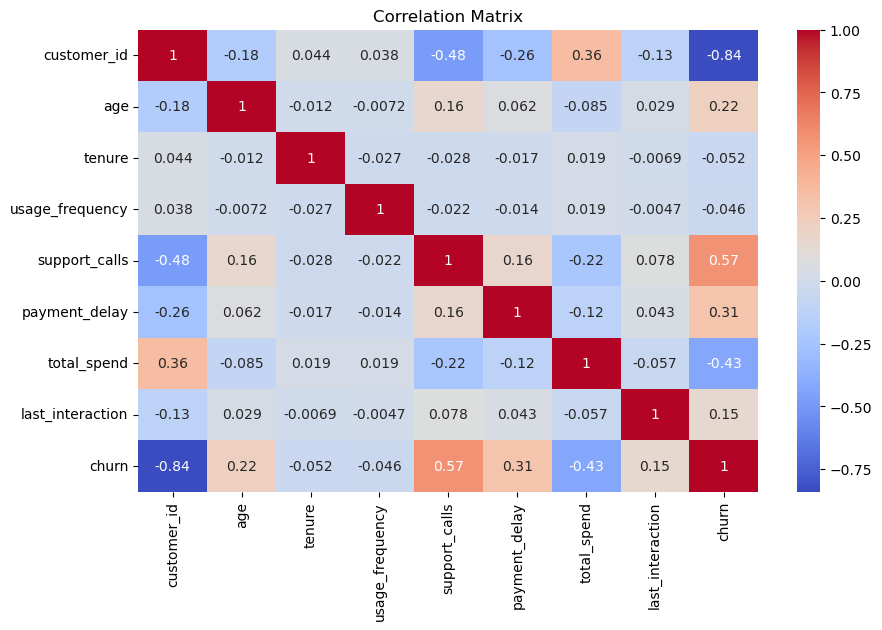

In [4]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### STEP 3.3.2 – HIGH-RISK SEGMENTS

In [5]:
high_risk = df[
    (df['support_calls'] >= 5) &
    (df['payment_delay'] >= 10) &
    (df['tenure'] < 12)
]

high_risk.shape


(17837, 12)

### STEP 3.3.3 – TENURE BUCKET ANALYSIS

C:\Users\Prafull Wahatule\AppData\Local\Temp\ipykernel_7600\3793228014.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_bucket')['churn'].mean().plot(kind='bar')


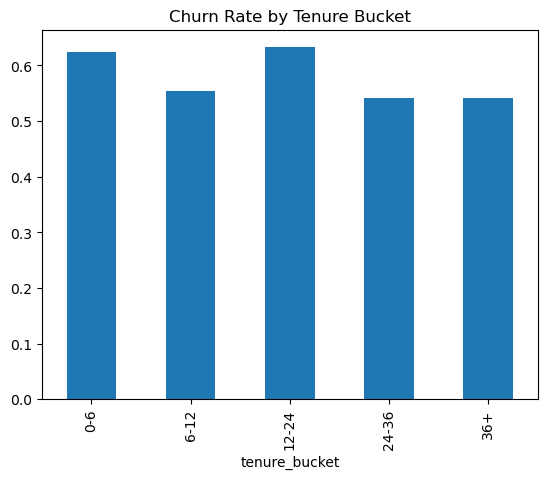

In [7]:
df['tenure_bucket'] = pd.cut(
    df['tenure'],
    bins=[0, 6, 12, 24, 36, 60],
    labels=['0-6', '6-12', '12-24', '24-36', '36+']
)

df.groupby('tenure_bucket')['churn'].mean().plot(kind='bar')
plt.title("Churn Rate by Tenure Bucket")
plt.show()
